<a href="https://colab.research.google.com/github/alitourani/deep-learning-from-scratch/blob/main/Codes/ML/Simple_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Salary Prediction**

🎯 **Goal:** The main goal of this application is to predict the salary of a person based on his/her work experience

🗄️ **Dataset Source:** https://www.payscale.com/research/US/Job=Computer_Programmer/Salary

**1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**2. Create the Dataset**

Shape of the dataset (rows, cols): (8, 2)

Dataset instances:
    Years experience  Salary
0               0.0    58.5
1               2.0    59.2
2               4.0    60.0
3               6.0    66.0
4               8.0    70.4
5              10.0    76.6
6              19.0    79.0
7              22.0    87.5

A brief summary:
        Years experience     Salary
count          8.000000   8.000000
mean           8.875000  69.650000
std            7.881941  10.656185
min            0.000000  58.500000
25%            3.500000  59.800000
50%            7.000000  68.200000
75%           12.250000  77.200000
max           22.000000  87.500000 



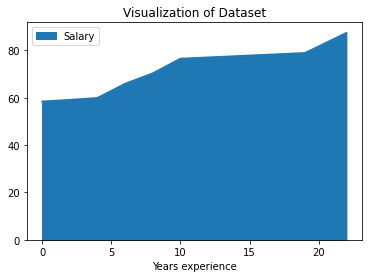

In [ ]:
# Columns of the dataset
columns = ['Years experience', 'Salary']

# Data (estimation): a list of (year, salary) pairs
data = np.array([[0, 58.5], [2, 59.2], [4, 60.0], [6, 66.0], [8, 70.4], [10, 76.6], [19, 79.0], [22, 87.5]])

# Creating the DataFrame
dataset = pd.DataFrame(data, columns=columns)
print('Shape of the dataset (rows, cols):', dataset.shape)
print('\nDataset instances:\n', dataset)
print('\nA brief summary:\n', dataset.describe(), '\n')

# Plotting the dataset
dataset.plot(x=columns[0], y=columns[1], kind="area", 
             title="Visualization of Dataset")

**3. Working with Data**

3.1. Splitting training set and test set

In [ ]:
# Projecting dataset columns
experiences = dataset[[columns[0]]]
salaries = dataset[columns[1]]

# Configuration
testSize = 0.2 # 20% for test and 80% for train

# Splitting
experienceTrain, experienceTest, salaryTrain, salaryTest = train_test_split(experiences, salaries, test_size=testSize, random_state=101)

# Sample DataFrames for visualization of training and test set
trainingData = experienceTrain.merge(salaryTrain, right_index=True, left_index=True, sort=True)
testData = experienceTest.merge(salaryTest, right_index=True, left_index=True, sort=True)

print('Training Data:\n', trainingData)
print('\nTest Data:\n', testData)

Training Data:
    Years experience  Salary
1               2.0    59.2
3               6.0    66.0
4               8.0    70.4
5              10.0    76.6
6              19.0    79.0
7              22.0    87.5

Test Data:
    Years experience  Salary
0               0.0    58.5
2               4.0    60.0


3.2. Training the Model

In [ ]:
# In this example, we are using the Linear Regression model, as the prediction (salary) is a continuous number
model = LinearRegression()

# Fitting the model with training data
model.fit(experienceTrain, salaryTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3.3. Testing the Model

In [ ]:
# Accuracy of the model
predictions = model.predict(experienceTest)

print('Actual Data:', salaryTest.values)
print('Predicted Data:', predictions)

# The coefficient of determination of the prediction
score = model.score(experiences, salaries)
print('\nCoefficient Score:', round(score, 2))

Actual Data: [58.5 60. ]
Predicted Data: [59.35351801 64.28360111]

Coefficient Score: 0.92
